In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [6]:
#Converting data to DataFrame and adding the Target (price) column
X_data = california_housing.frame.drop('MedHouseVal', axis=1)
y_target = california_housing.frame['MedHouseVal']

print(" Data Loaded Successfully (first 3 row) ---")
print(X_data.head(3))

 Data Loaded Successfully (first 3 row) ---
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  


In [7]:
#The Difference Between Training and Testing
#random_state with random 
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.2, random_state=42)

print(f"\n--- 2. Training/Testing split ---")
print(f"Training Set Shape (X_train): {len(X_train)}")
print(f"Test_Set_Shape (X_test): {len(X_test)}")

      


--- 2. Training/Testing split ---
Training Set Shape (X_train): 16512
Test_Set_Shape (X_test): 4128


In [9]:
#Multi Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

print("\n--- 3.Model Training successfully ---")
print(f"Training Model Coefficients (Coefficients): {model.coef_.round(3)}")


--- 3.Model Training successfully ---
Training Model Coefficients (Coefficients): [ 0.449  0.01  -0.123  0.783 -0.    -0.004 -0.42  -0.434]


In [11]:
import numpy as np
# Assuming x_train and y_train are numpy arrays

def gradient_descent(X, y, learning_rate, n_iterations):
    """
    Manuel Linear Regression for Gradien Descent

    Parametres:
    X: Training features (numpy array)
    y: Target values (numpy array)
    learning_rate: Education speed ( How big step)
    n_iterations: İterasion number (How many step)
    """
    m, n = X.shape

    # 1. Initial Coefficients: Initialize Coefficients (W) and Bias (b) to zero
    W = np.zeros(n) # weights (coefficients)
    b = 0           #Bias (intercept)
    cost_history = []

    for i in range(n_iterations):
        
        # 2. Make a Prediction (Hypothesis): h = W * X + b
        h = np.dot(X, W) + b
        
        # 3. Calculate Error: Estimate - Actual Value
        error = h - y
        
        # 4. Calculate and Save Cost (MSE)
        cost = (1/ (2 * m)) * np.sum(error**2)
        cost_history.append(cost)
        
        # 5. Calculate Gradients (Direction of Change)
        dW = (1 / m) * np.dot(X.T, error) # Coefficient (W) gradiant
        db = (1 / m) * np.sum(error)      # Bias (b) gradient
        
        # 6. Update Coefficients (Learning Step)
        W = W -learning_rate * dW
        b = b - learning_rate * db

    return W, b, cost_history

# X_train and y_train numpy array translate
X_train_np = X_train.values
y_train_np = y_train.values



--- 1000 İterasion after ---
Final Bias(Intercept): nan
Final Coefficients (W): [nan nan nan nan nan nan nan nan]
Last Cost (Error): nan


C:\Users\hüseyin\AppData\Local\Temp\ipykernel_25476\473190673.py:30: RuntimeWarning: overflow encountered in square
  cost = (1/ (2 * m)) * np.sum(error**2)
C:\ProgramData\anaconda3\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\hüseyin\AppData\Local\Temp\ipykernel_25476\473190673.py:38: RuntimeWarning: invalid value encountered in subtract
  W = W -learning_rate * dW


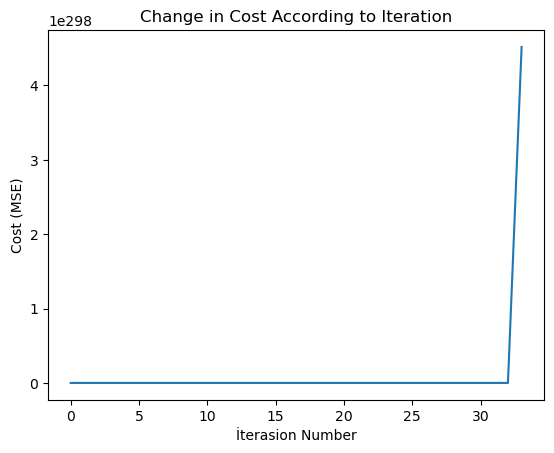

In [14]:
#Application and Observation
#Now let's run the Gradient Descent function and observe how the model learns.
# Model run parameters
learning_rate = 0.01
n_iterations = 1000

#Training model
final_W, final_b, cost_history = gradient_descent(X_train_np, y_train_np, learning_rate, n_iterations)
print(f"\n--- 1000 İterasion after ---")
print(f"Final Bias(Intercept): {final_b:.4f}")
print(f"Final Coefficients (W): {final_W.round(4)}")
print(f"Last Cost (Error): {cost_history[-1]:.4f}")

# (Additional Step) Plotting Cost History:
import matplotlib.pyplot as plt
plt.plot(cost_history)
plt.title('Change in Cost According to Iteration')
plt.xlabel('İterasion Number')
plt.ylabel('Cost (MSE)')
plt.show()


In [16]:
# predict make
y_pred = model.predict(X_test)

# Evaluation (MSE and R-Square)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n--- 4. Forecast and Evaluation ---")
print(f"Average Squad Errro (MSE): {mse:.4f}") 
print(f"R-Squad Score (R²): {r2:.4f}") # The closer to 1.0 the better

# Actual and Forecast Comparison (First 5 examples)
to_compare = pd.DataFrame({'Real Price': y_test.head().round(2), 'Guess': y_pred[:5].round(2)})
print("\nReal Price vs Estimated Prices:")
print(to_compare)      


--- 4. Forecast and Evaluation ---
Average Squad Errro (MSE): 0.5559
R-Squad Score (R²): 0.5758

Real Price vs Estimated Prices:
       Real Price  Guess
20046        0.48   0.72
3024         0.46   1.76
15663        5.00   2.71
20484        2.19   2.84
9814         2.78   2.60


In [17]:
# model save (joblib)
joblib.dump(model, 'house_price_predict_model.joblib')

print("\n--- 5. model save ---")
print("Model, 'house_price_predict_model.joblib' for name save.")


--- 5. model save ---
Model, 'house_price_predict_model.joblib' for name save.
